In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Logistic Regression with Classification


In [3]:
# load Data using pandas
path = 'DataSets\\healthcare-dataset-stroke-data.csv'
logistic_data = pd.read_csv(path)

<span style="color: green; font-weight: bold; font-size: 30px;">Pre-Processing for logistic analysis...</span>


In [456]:
# show the first 10 rows
logistic_data.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [457]:
logistic_data.shape

(5110, 12)

In [458]:
# Drop the unnecessary columns
logistic_data.drop(['id'], axis=1, inplace=True)

In [459]:
logistic_data.shape

(5110, 11)

In [460]:
logistic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


**bmi contains 201 null value...**


In [461]:
logistic_data.dropna(inplace= True)

<span style="color: red; font-size: 30px">Encoding the categorical data</span>


<span style="color: blue; font-size: 25px">-- gender column</span>


In [462]:
logistic_data['gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [463]:
logistic_data['gender'].value_counts()

gender
Female    2897
Male      2011
Other        1
Name: count, dtype: int64

In [464]:
#drop the other gender type
logistic_data = logistic_data[logistic_data['gender'] != 'Other']

In [465]:
logistic_data['gender'].value_counts()

gender
Female    2897
Male      2011
Name: count, dtype: int64

In [466]:
# encode male with 1 and female to 0
logistic_data['gender'] = [1 if value == 'Male' else 0 for value in logistic_data['gender']]

In [467]:
logistic_data['gender'].unique()

array([1, 0])

<span style="color: blue; font-size: 25px">-- ever_married column</span>


In [468]:
logistic_data['ever_married'].unique()

array(['Yes', 'No'], dtype=object)

In [469]:
# encode the boolean values
logistic_data['ever_married'] = [1 if value == 'Yes' else 0 for value in logistic_data['ever_married']]

In [470]:
logistic_data['ever_married'].unique()

array([1, 0])

<span style="color: blue; font-size: 25px">-- work_type column</span>


In [471]:
logistic_data['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [472]:
logistic_data['work_type'].value_counts()

work_type
Private          2810
Self-employed     775
children          671
Govt_job          630
Never_worked       22
Name: count, dtype: int64

In [473]:
# Create the encoder using sklearn
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded = encoder.fit_transform(logistic_data[['work_type']])
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['work_type']))

#Encode the values
logistic_data = pd.concat([logistic_data.drop('work_type', axis=1), encoded_df], axis=1)

In [474]:
logistic_data.shape

(5101, 14)

<span style="color: blue; font-size: 25px">-- Residence_type columns</span>

In [475]:
logistic_data['Residence_type'].unique()

array(['Urban', 'Rural', nan], dtype=object)

In [476]:
logistic_data['Residence_type'].value_counts()

Residence_type
Urban    2490
Rural    2418
Name: count, dtype: int64

In [477]:
# encode the Residence_type 1 for urban and 0 for Rural
logistic_data['Residence_type'] = [1 if value == 'Urban' else 0 for value in logistic_data['Residence_type']]

In [478]:
logistic_data['Residence_type'].unique()

array([1, 0])

<span style="color: blue; font-size: 25px">-- Smoking status column</span>

In [479]:
logistic_data['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown', nan],
      dtype=object)

In [480]:
logistic_data['smoking_status'].value_counts()

smoking_status
never smoked       1852
Unknown            1483
formerly smoked     836
smokes              737
Name: count, dtype: int64

In [481]:
# Create the encoder using sklearn
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded = encoder.fit_transform(logistic_data[['smoking_status']])
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['smoking_status']))

#Encode the values
logistic_data = pd.concat([logistic_data.drop('smoking_status', axis=1), encoded_df], axis=1)

---

In [482]:
logistic_data.shape

(5109, 17)

In [483]:
logistic_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5109 entries, 0 to 5099
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   gender                          4908 non-null   float64
 1   age                             4908 non-null   float64
 2   hypertension                    4908 non-null   float64
 3   heart_disease                   4908 non-null   float64
 4   ever_married                    4908 non-null   float64
 5   Residence_type                  5101 non-null   float64
 6   avg_glucose_level               4908 non-null   float64
 7   bmi                             4908 non-null   float64
 8   stroke                          4908 non-null   float64
 9   work_type_Never_worked          4908 non-null   float64
 10  work_type_Private               4908 non-null   float64
 11  work_type_Self-employed         4908 non-null   float64
 12  work_type_children              4908 no

In [484]:
logistic_data.isnull().sum()

gender                            201
age                               201
hypertension                      201
heart_disease                     201
ever_married                      201
Residence_type                      8
avg_glucose_level                 201
bmi                               201
stroke                            201
work_type_Never_worked            201
work_type_Private                 201
work_type_Self-employed           201
work_type_children                201
smoking_status_formerly smoked      8
smoking_status_never smoked         8
smoking_status_smokes               8
smoking_status_nan                  8
dtype: int64

In [485]:
# Drops ALL rows with ANY null values
logistic_data.dropna(inplace=True)

In [486]:
logistic_data.isnull().sum()

gender                            0
age                               0
hypertension                      0
heart_disease                     0
ever_married                      0
Residence_type                    0
avg_glucose_level                 0
bmi                               0
stroke                            0
work_type_Never_worked            0
work_type_Private                 0
work_type_Self-employed           0
work_type_children                0
smoking_status_formerly smoked    0
smoking_status_never smoked       0
smoking_status_smokes             0
smoking_status_nan                0
dtype: int64

In [487]:
logistic_data.head(5)

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,smoking_status_nan
0,1.0,67.0,0.0,1.0,1.0,1.0,228.69,36.6,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,80.0,0.0,1.0,1.0,0.0,105.92,32.5,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,49.0,0.0,0.0,1.0,1.0,171.23,34.4,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.0,79.0,1.0,0.0,1.0,0.0,174.12,24.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
5,1.0,81.0,0.0,0.0,1.0,1.0,186.21,29.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [488]:
logistic_data.shape

(4715, 17)

_Summary of the dataset_

---

**bmi contains missing values , dropped all null values**

**some types are appropriate:**

    - > variables like age, avg_glucose_level and bmi are float64

    - > variables like id, hypertension, heart_disease and stroke are int64

**There are some categorical features present, so encoding was necessary**

---


<span style="color: green; font-weight: bold; font-size: 30px;">Starting logistic regression classification...</span>

In [489]:
# Check data to ensure that the data is not biased.
logistic_data['stroke'].value_counts()

stroke
0.0    4506
1.0     209
Name: count, dtype: int64

_The data may be biased to negative diagnosis_

---

<span style="color:rgb(181, 52, 255); font-weight: bold; font-size: 20px;">-- Divide data into target variable and predictors </span>

In [490]:
Y = logistic_data['stroke']
X = logistic_data.drop(['stroke'], axis = 1)

In [491]:
Y.head(5)

0    1.0
2    1.0
3    1.0
4    1.0
5    1.0
Name: stroke, dtype: float64

In [492]:
X.head(5)

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,smoking_status_nan
0,1.0,67.0,0.0,1.0,1.0,1.0,228.69,36.6,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,80.0,0.0,1.0,1.0,0.0,105.92,32.5,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,49.0,0.0,0.0,1.0,1.0,171.23,34.4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.0,79.0,1.0,0.0,1.0,0.0,174.12,24.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
5,1.0,81.0,0.0,0.0,1.0,1.0,186.21,29.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


<span style="color:rgb(181, 52, 255); font-weight: bold; font-size: 20px;">-- Normalizing the predictors </span>

In [493]:
#create a scaler object
scaler = StandardScaler()

# fit the scaler to the data
X_scaled = scaler.fit_transform(X)

In [494]:
X_scaled

array([[ 1.19704659,  1.06559145, -0.32081767, ..., -0.78404466,
        -0.4182481 ,  0.        ],
       [ 1.19704659,  1.64192262, -0.32081767, ..., -0.78404466,
         2.39092539,  0.        ],
       [-0.83538937,  0.26759443, -0.32081767, ...,  1.27543755,
        -0.4182481 ,  0.        ],
       ...,
       [-0.83538937,  0.75525928, -0.32081767, ...,  1.27543755,
        -0.4182481 ,  0.        ],
       [-0.83538937,  0.4449271 , -0.32081767, ..., -0.78404466,
        -0.4182481 ,  0.        ],
       [ 1.19704659,  0.53359344, -0.32081767, ..., -0.78404466,
        -0.4182481 ,  0.        ]], shape=(4715, 16))

<span style="color:rgb(181, 52, 255); font-weight: bold; font-size: 20px;">-- Split the data into 80/20 </span>

In [495]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=7)

In [496]:
X_train

array([[ 1.19704659,  0.71092611, -0.32081767, ..., -0.78404466,
         2.39092539,  0.        ],
       [ 1.19704659, -1.50573226, -0.32081767, ..., -0.78404466,
        -0.4182481 ,  0.        ],
       [ 1.19704659,  1.50892312, -0.32081767, ...,  1.27543755,
        -0.4182481 ,  0.        ],
       ...,
       [ 1.19704659,  1.28725728, -0.32081767, ..., -0.78404466,
         2.39092539,  0.        ],
       [ 1.19704659, -1.55006543, -0.32081767, ..., -0.78404466,
        -0.4182481 ,  0.        ],
       [-0.83538937,  0.84392561,  3.1170353 , ..., -0.78404466,
        -0.4182481 ,  0.        ]], shape=(3772, 16))

In [497]:
X_test

array([[-0.83538937,  1.64192262, -0.32081767, ..., -0.78404466,
        -0.4182481 ,  0.        ],
       [-0.83538937, -1.46139909, -0.32081767, ..., -0.78404466,
        -0.4182481 ,  0.        ],
       [ 1.19704659, -1.41706593, -0.32081767, ..., -0.78404466,
        -0.4182481 ,  0.        ],
       ...,
       [-0.83538937,  1.59758946, -0.32081767, ...,  1.27543755,
        -0.4182481 ,  0.        ],
       [ 1.19704659, -0.22007041, -0.32081767, ...,  1.27543755,
        -0.4182481 ,  0.        ],
       [-0.83538937,  0.62225977, -0.32081767, ..., -0.78404466,
        -0.4182481 ,  0.        ]], shape=(943, 16))

In [498]:
Y_train

192     1.0
483     0.0
3891    0.0
3133    0.0
1039    0.0
       ... 
4493    0.0
2675    0.0
583     0.0
1287    0.0
4457    0.0
Name: stroke, Length: 3772, dtype: float64

In [499]:
Y_test

1289    0.0
2148    0.0
3132    0.0
1773    0.0
474     0.0
       ... 
1175    0.0
76      1.0
77      1.0
1498    0.0
3070    0.0
Name: stroke, Length: 943, dtype: float64

<span style="color:rgb(181, 52, 255); font-weight: bold; font-size: 20px;">-- Training the model </span>

In [501]:
# create the model
Logistic_model = LogisticRegression(class_weight= 'balanced')

# train the model on the training data
Logistic_model.fit(X_train, Y_train)

# predict the target variable on the test data
Y_pred = Logistic_model.predict(X_test)

<span style="color:rgb(181, 52, 255); font-weight: bold; font-size: 20px;">-- Evaluating the model </span>

<span style="color:cyan; font-weight: funny; font-size: 15px;"> 1- Check the accuracy of the model</span>


In [502]:
accuracy = accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {accuracy*100: .2f} %')

Accuracy:  77.20 %


<span style="color:cyan; font-weight: funny; font-size: 15px;"> 2- Calculate the confusion_matrix</span>


In [503]:
# Create the confusion matrix
cm = confusion_matrix(Y_test, Y_pred)
cm 

array([[706, 204],
       [ 11,  22]])

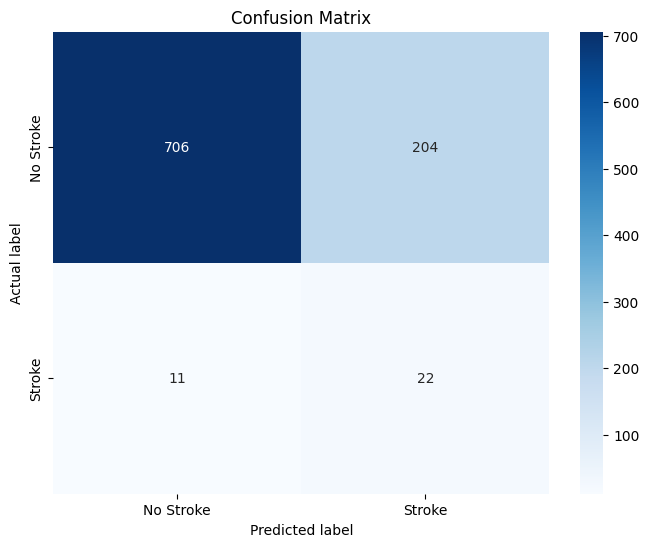

In [509]:
# Visualize the cm
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Stroke', 'Stroke'],
            yticklabels=['No Stroke', 'Stroke'])
plt.title('Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

<span style="color:cyan; font-weight: funny; font-size: 15px;"> 3- Report the analysis of the model</span>


In [504]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

         0.0       0.98      0.78      0.87       910
         1.0       0.10      0.67      0.17        33

    accuracy                           0.77       943
   macro avg       0.54      0.72      0.52       943
weighted avg       0.95      0.77      0.84       943

